In [1]:
!pip install xgboost

In [0]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving PREPDATA.csv to PREPDATA.csv


In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,12]

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

pd.options.display.max_columns = None

In [6]:
df = pd.read_csv('PREPDATA (1).csv')
df.head()

,Serial Number,BSC Indicator,Resigned,Is MPT,Is Re-Entry,Exp at Action,Age at Action,SUP Is MPT,SUP Exp at Action,SUP Age at Action,Is SUP,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,SUP Older Than EMP,Age Diff SUPvsEMP,EduAllowFinishedIn1y,EduAllowYearDiff,EDU Allowance,House Loan,Is STEM,MAX Degree,Year After Grad,count3M,days3M,count1Y,days1Y,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
0,1,0,0,1,0,43.502604,59.839696,1.0,17.339165,44.838703,0.0,0,1,0,1,0,-15.000992,NaN,NaN,0.0,0.0,0.0,1.0,45.586152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,6,0,0,0,0,37.668125,59.839696,1.0,20.005887,52.425443,0.0,1,0,0,1,0,-7.414252,NaN,NaN,0.0,0.0,0.0,1.0,46.752500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,8,0,0,1,0,36.592127,59.426272,1.0,32.088270,59.508409,0.0,0,1,0,1,1,0.082137,NaN,NaN,0.0,0.0,0.0,1.0,37.753000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,11,0,0,1,0,37.421713,59.836958,1.0,31.669370,58.421460,0.0,0,1,0,1,0,-1.415498,NaN,NaN,0.0,0.0,0.0,2.0,9.423876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,13,0,0,0,0,40.586733,59.836958,1.0,13.837382,41.755820,0.0,0,1,0,1,0,-18.081138,NaN,NaN,0.0,0.0,0.0,1.0,43.502604,4.0,6.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,1.454545


In [0]:
X = df.drop('Resigned',axis=1)
X = X.drop('Serial Number',axis=1)
y = df['Resigned']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

In [0]:
gbm = xgb.XGBClassifier(

        max_depth=7,
        learning_rate=0.05,
        n_estimators=300
    
      ).fit(X_train, y_train)

In [9]:
predictions = gbm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89       757
          1       0.84      0.79      0.81       469

avg / total       0.86      0.86      0.86      1226



In [11]:
print(confusion_matrix(y_test,predictions))

[[688  69]
 [100 369]]


Text(0,0.5,'Frequency')

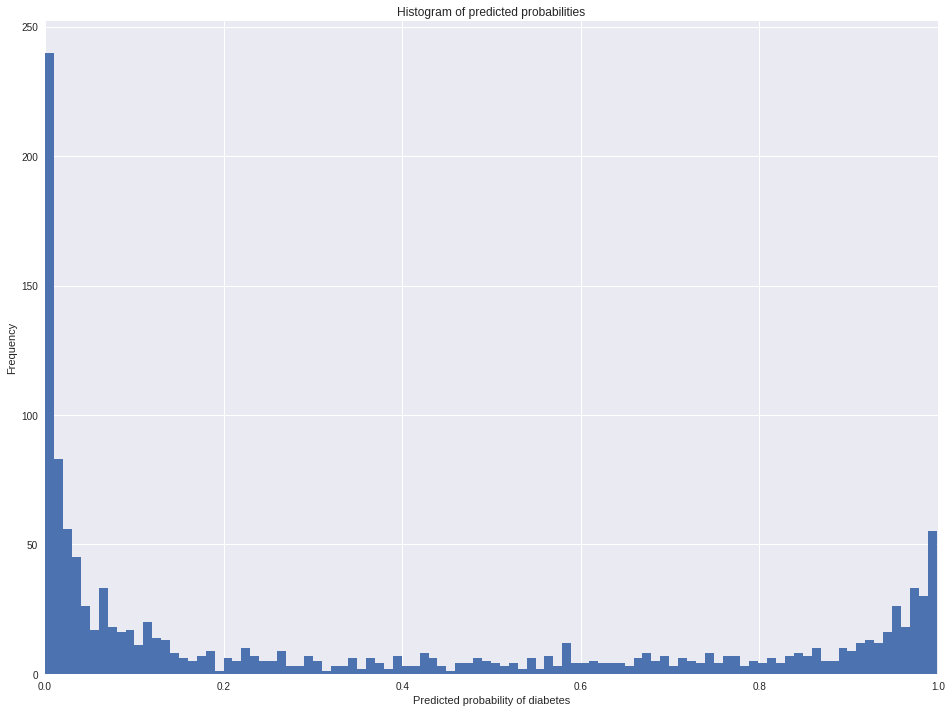

In [12]:
gbm_pred_prob = gbm.predict_proba(X_test)[:, 1]
plt.hist(gbm_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

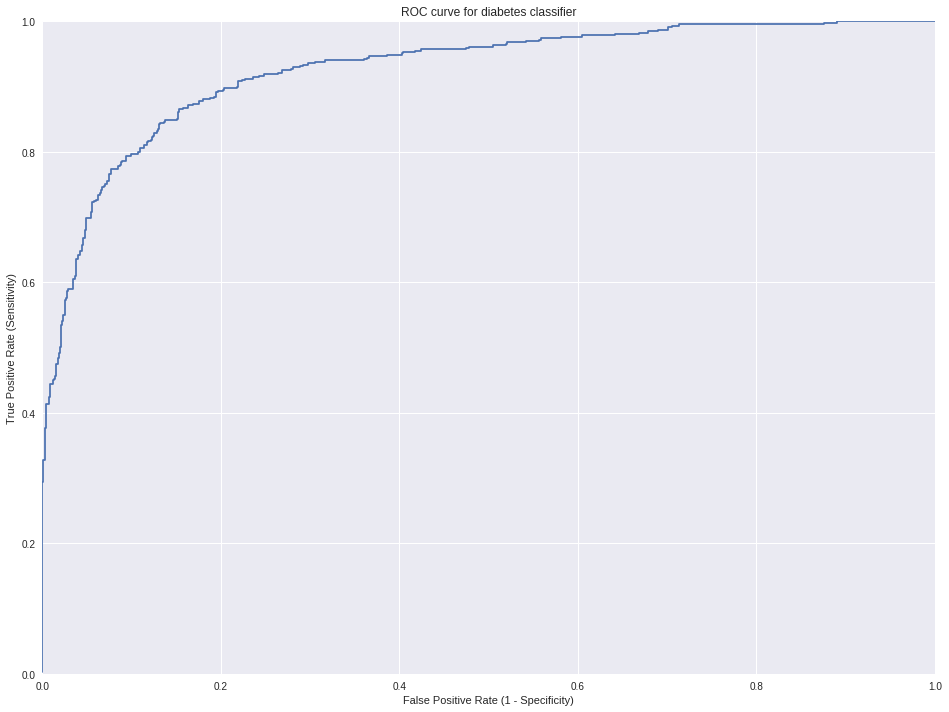

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbm_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(gbm, X, y, cv=10, scoring='roc_auc').mean()

0.7963579855886724

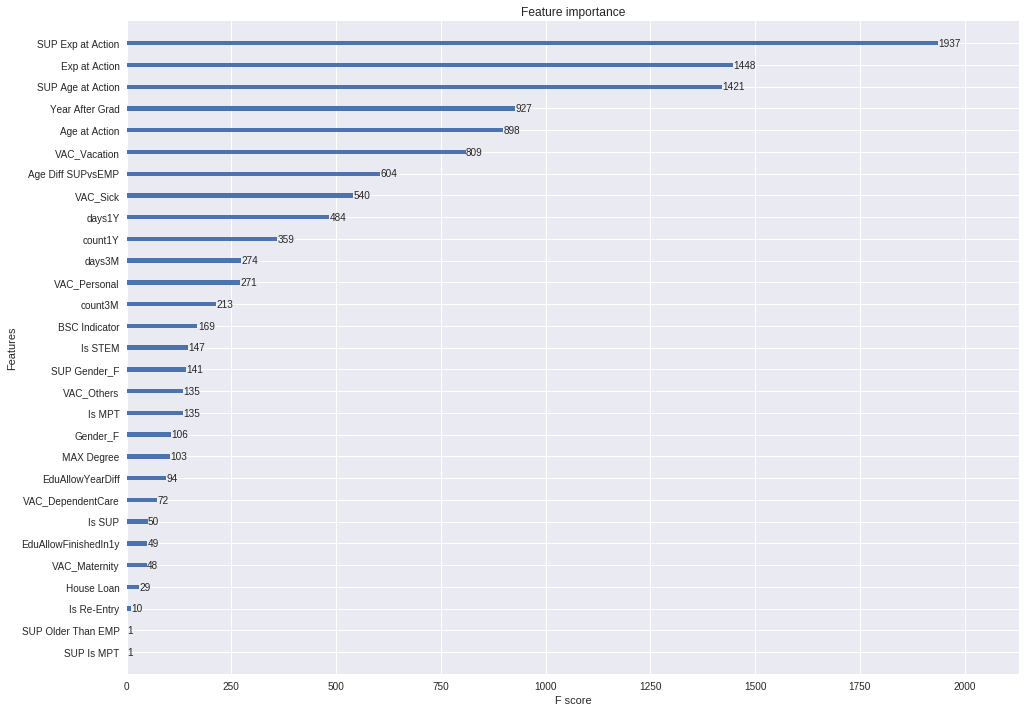

In [15]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model no training data
model = XGBClassifier(
        max_depth=7,
        learning_rate=0.05,
        n_estimators=300
)
model.fit(X, y)
# plot feature importance
plot_importance(model)

plt.show()

# **Build model from full dataset**

In [0]:
gbm = xgb.XGBClassifier(

        max_depth=7,
        learning_rate=0.05,
        n_estimators=300
    
      ).fit(X, y)

In [22]:
uploaded = files.upload()

Saving PREPDATA2018.csv to PREPDATA2018.csv


In [23]:
df_pred = pd.read_csv('PREPDATA2018 (1).csv')
df_pred.head()

,Serial Number,BSC Indicator,Resigned,Is MPT,Is Re-Entry,Exp at Action,Age at Action,SUP Is MPT,SUP Exp at Action,SUP Age at Action,Is SUP,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,SUP Older Than EMP,Age Diff SUPvsEMP,EduAllowFinishedIn1y,EduAllowYearDiff,EDU Allowance,House Loan,Is STEM,MAX Degree,Year After Grad,count3M,days3M,count1Y,days1Y,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
0,357,1,0,1,0,37.306721,58.812980,1.0,32.477053,58.728105,0.0,1,0,1,0,0,-0.084875,NaN,NaN,0.0,0.0,0.0,1.0,38.147258,4.0,13.0,9.0,26.0,0.5,0.0,0.000,1.000000,1.000000,1.810787
1,368,0,0,1,0,36.838539,59.839696,1.0,8.586076,35.168416,0.0,1,0,0,1,0,-24.671280,NaN,NaN,0.0,0.0,0.0,1.0,37.922750,6.0,13.0,17.0,38.0,0.0,0.0,6.000,1.333333,1.531915,2.178218
2,371,0,0,1,0,37.063047,59.064868,1.0,32.559190,57.643894,1.0,0,1,0,1,0,-1.420974,NaN,NaN,0.0,0.0,0.0,1.0,38.177375,8.0,8.0,25.0,28.0,0.0,0.0,0.250,0.000000,6.666667,1.296482
3,378,0,0,0,0,36.896035,57.476882,1.0,26.062137,46.727859,0.0,0,1,0,1,0,-10.749023,NaN,NaN,0.0,1.0,0.0,1.0,38.393670,9.0,12.0,19.0,24.0,0.0,0.0,3.875,1.000000,6.897436,1.128319
4,414,0,0,1,0,34.089680,59.839696,1.0,27.425614,50.090009,0.0,0,1,0,1,0,-9.749687,NaN,NaN,0.0,0.0,1.0,1.0,37.509326,2.0,2.0,10.0,11.0,0.0,0.0,6.000,0.000000,0.000000,1.875000


In [0]:
X_pred = df_pred.drop('Resigned',axis=1)
X_pred = X_pred.drop('Serial Number',axis=1)
y_pred = df_pred['Resigned']

In [0]:
actual_predictions = gbm.predict(X_pred)

In [0]:
print(classification_report(y_pred,actual_predictions))